An early result in the study of human dynamic systems is the claim that response times to email follow a power law distribution (http://cds.cern.ch/record/613536/). This result has been built on by others (http://www.uvm.edu/~pdodds/files/papers/others/2004/johansen2004.pdf, http://dx.doi.org/10.1103/physreve.83.056101). However, Clauset, Shalizi, and Newman (citation needed) have challenged the pervasive use discovery of powerlaws, claiming that these studies often depend on unsound statistics.

Here we apply the method of power law distribution fitting and testing to the email response times of several public mailing lists. 

In [1]:
from bigbang.archive import Archive
import pandas as pd

arx = Archive("ipython-dev", archive_dir="../archives")
print(arx.data.shape)

(15485, 6)


In [2]:
arx.data.drop_duplicates(subset=("From", "Date"), inplace=True)

We will look at messages in our archive that are responses to other messages and how long after the original email the response was made.

In [3]:
response_times = []

In [4]:
response_times = []
for x in list(arx.data.iterrows()):
    if x[1]["In-Reply-To"] is not None:
        try:
            d1 = arx.data.loc[x[1]["In-Reply-To"]]["Date"]

            if isinstance(d1, pd.Series):
                d1 = d1[0]

            d2 = x[1]["Date"]

            rt = d2 - d1

            response_times.append(rt.total_seconds())

        except AttributeError as e:
            print(e)
        except TypeError as e:
            print(e)
        except KeyError as e:
            # print e -- suppress error
            pass

In [5]:
len(response_times)

11696

In [6]:
import matplotlib.pyplot as plt

%matplotlib inline

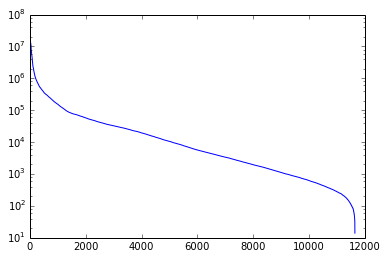

In [7]:
plt.semilogy(sorted(response_times, reverse=True))

In [9]:
import powerlaw

f = powerlaw.Fit(response_times)
print(f.power_law.alpha)
print(f.xmin)
print(f.D)
R, p = f.distribution_compare("power_law", "lognormal")
print(R, p)

1.74259853197
27753.0
0.018193948838
-5.13102609753 0.0552301041786


Calculating best minimal value for power law fit


We conclude that there is no reason to maintain that there is a power law distribution of email response times.